# Project 1 - Happy Customers

**Goal(s):**

Predict if a customer is happy or not based on the answers they give to the questions asked on a survey. These questions where as follows:

- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

**Results:**

- We were able to reach 81% of accuracy by using an Ada Boost Gradient model.
<br><br>
- We concluded that the questions that were more important when predicting a customer's happiness are as follow. These questions preserve the most important information about the problem while increasing predictability of the data we have:
    - 'X1: Order delivered on time'
    - 'X3: Ordered everything wanted'
    - 'X4: Paid a good price'
    - 'X6: App easy to use'
<br><br>
- The following questions can be removed from the next survey:
    - 'X2: Contents as expected'
    - 'X5: Satisfied with courier'

## Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()
feature_names = ['Y: Happy customers', 
                'X1: Order delivered on time',
                'X2: Contents as expected',
                'X3: Ordered everything wanted',
                'X4: Paid a good price',
                'X5: Satisfied with courier',
                'X6: App easy to use']

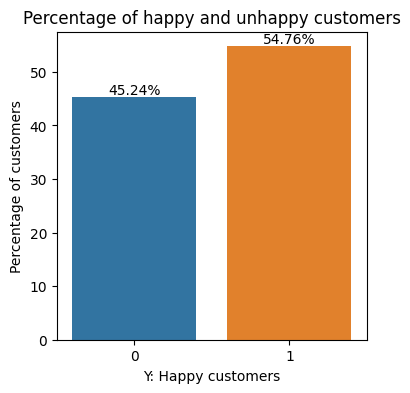

In [3]:
df1 = df['Y'].value_counts(normalize=True)
df1 = df1.mul(100)

fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.barplot(x=df1.index, y=df1.values, orient='v', ax=ax).set(xlabel=feature_names[0],
                                                                ylabel='Percentage of customers',
                                                                title='Percentage of happy and unhappy customers');
ax.bar_label(ax.containers[0], fmt='%.2f%%');

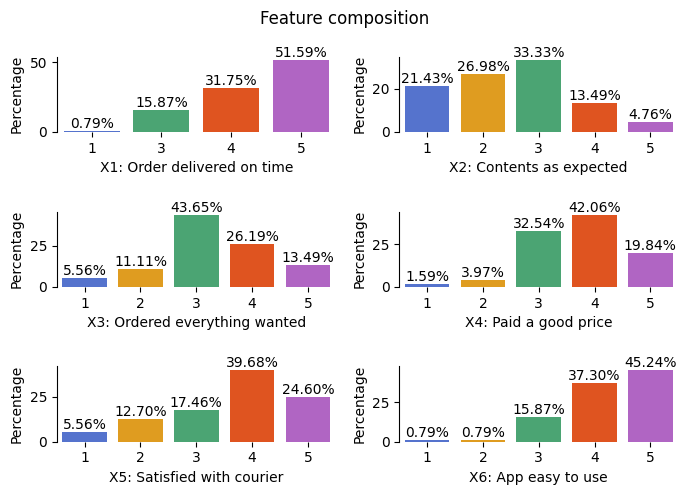

In [4]:
# Set up the matplotlib figure
from matplotlib.pyplot import xticks


fig, ax = plt.subplots(3, 2, figsize=(7, 5), sharex=False)
fig.suptitle('Feature composition')
colors = {1:'royalblue', 2:'orange', 3:'mediumseagreen', 4:'orangered', 5:'mediumorchid'}

count, i, j = 0, 0, 0

for feat, col in enumerate(df.columns[1::]):
    
    df1 = df[col].value_counts(normalize=True)
    df1 = df1.mul(100)

    sns.barplot(x=df1.index, y=df1.values, orient='v',
                palette=colors, ax=ax[i,j]).set(xlabel=feature_names[feat+1],ylabel='Percentage')
    ax[i,j].bar_label(ax[i,j].containers[0], fmt='%.2f%%');
    
    j += 1
    count += 1
    
    if j == 2: j = 0
    if (count % 2 == 0): i += 1


# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

The two previous graphs allow us to understand the composition of the dataset:

- Happy and unhappy customers: 45.24% were unhappy / 54.76% were happy

- X1, followed by X6 are the features with most 5 rate reviews. This might affect on the importance of these variables for getting **happy** customers.

- X2 has the most 1 rate reviews. This might affect on the importance of these variables for getting **unhappy** customers.

- If considering rates of 4 and 5 points as "positive" rates, X1 is the feature with most percentage of positive reviews (83.34%), followed by X6 (82.54%). Features X5 and X4 have 64.28% and 61.90% of positive reviews, respectively.

Lets explore feature behaviour against the target variable:

In [5]:
def get_df_x_vs_y(x):
    
    Y0_mask = df['Y'] == 0
    Y1_mask = df['Y'] == 1

    df_x = pd.DataFrame({
        1: [df[Y0_mask & (df[x] == 1)].shape[0], df[Y1_mask & (df[x] == 1)].shape[0]],
        2: [df[Y0_mask & (df[x] == 2)].shape[0], df[Y1_mask & (df[x] == 2)].shape[0]],
        3: [df[Y0_mask & (df[x] == 3)].shape[0], df[Y1_mask & (df[x] == 3)].shape[0]],
        4: [df[Y0_mask & (df[x] == 4)].shape[0], df[Y1_mask & (df[x] == 4)].shape[0]],
        5: [df[Y0_mask & (df[x] == 5)].shape[0], df[Y1_mask & (df[x] == 5)].shape[0]],
    }, index = [0,1])
    return df_x

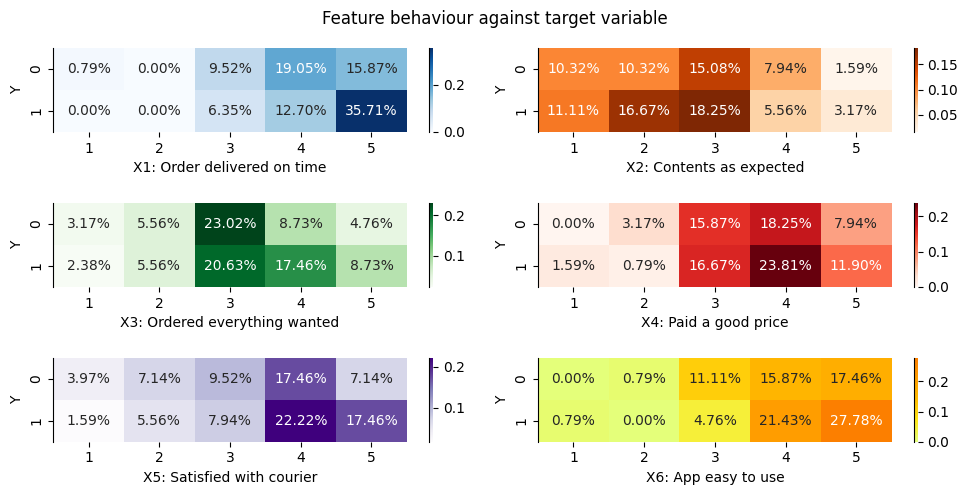

In [6]:
df_total = pd.DataFrame()

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize=(10, 5), sharex=False)
fig.suptitle('Feature behaviour against target variable')
colors = {1:'Blues', 2:'Oranges', 3:'Greens', 4:'Reds', 5:'Purples', 6:'Wistia'}
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

count, i, j = 0, 0, 0

for feat, col in enumerate(df.columns[1::]):
    
    df_x = get_df_x_vs_y(col)
    df_x = df_x.apply(lambda x: (x/df.shape[0]))
    sns.heatmap(df_x[[1, 2, 3, 4, 5]], cmap=colors[feat+1], annot=True, fmt='.2%', ax=axes[feat]).set(xlabel=feature_names[feat+1], ylabel='Y')

    j += 1
    count += 1
    
    if j == 2: j = 0
    if (count % 2 == 0): i += 1

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)


From this analysis we can conclude that:

- As predicted before, features X1 and X6 are those with most 5 rate reviews that ended up in an overall **happy** review. If considering rates of 4 and 5 as "positive" rates, 48.41% of the dataset has positive reviews on X1 that ended up in an overall **happy** review; whilst 34.92% ended up in an **unhappy** one. For feature X6 the values are 49.21% and 33.33%, respectively. Feature X5 follows the same patter with 39.68% and 24.60%, respectively

- As predicted before, X2 is the feature with most 1 rate reviews that ended up in an overall **unhappy** review. If considering rates of 1 and 2 as "negative" rates, 27.78% of the dataset has negative reviews on X2 that ended up in an overall **happy** review; whilst 20.64% ended up in an **unhappy** one.

In conclusion, we expect features **X1, X6 and X5** to have a positive impact on **happy** customers while expecting feature **X2** to have a positive impact on **unhappy** cutomers.

### Feature correlation

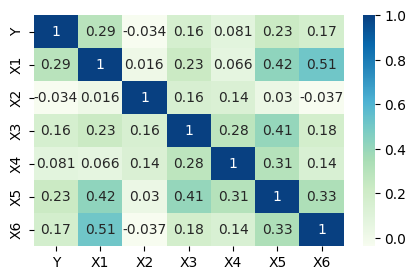

In [7]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='GnBu', fmt='0.2g');

Using Spearman's correlation, in general the features present between a low and moderate degree of correlation between one another.
The highest correlations are seen between features X1 (order delivered on time) and X5 (satisfied with courier) with a correlation of $0.42$ and features X1 and X6 (app easy to use) with a correlation of $0.51$. Followed by features X3 (ordered everything wanted) and X5 with a correlation of $0.41$ and features X6  with X5 with a correlation of $0.33$.
We can conclude that features X5 and X6 have the highest correlation values between features. A p-value analisis is needed to see if this correlation is significant or not.

On the other hand, the feature which has the highest correlation with the target feature Y is X1 (order delivered on time) with a correlation of $0.29$.

### Hypothesis test - Chi square test

- **<u>H0 (null hypothesis):</u>** two features **don't have** any correlation between them, they are **independent** of each other.

- **<u>HA (alternative hypothesis):</u>** two features **have** a correlation between them, they are **dependent** of each other


<br><br>
**<u>p-value:</u>** probability that when H0 is true, the statistical summary is equal to or greater than the actual observed results

- **p < 0.05** — means that the two categorical variables are **correlated**.

- **p > 0.05** — means that the two categorical variables are **not correlated**.



In [8]:
from scipy.stats import chi2_contingency

def chi2_test_result(df, feat1, feat2, alpha=0.05):
    new_test_df = pd.crosstab(index=df[feat2], columns=df[feat1],margins=True)
    # display(new_test_df)

    stat, p, dof, _= chi2_contingency(new_test_df)

    if p < alpha: print(f'[{feat1}-{feat2}] p-value: {np.round(p, 5)} --> result IS significant. Features are correlated.')
    else: pass # print(f'[{feat1}-{feat2}] p-value: {np.round(p, 3)} --> result IS NOT significant. Features are NOT correlated.')


print('If feature combination is not printed, features are NOT correlated.\n')
print('Target vs features')
for f in df.columns[1::]: chi2_test_result(df, 'Y', f)

print('Between variables')
for i, f1 in enumerate(df.columns[1::]): 
    i +=1
    for f2 in df.columns[i::]:
        if f1 != f2: chi2_test_result(df, f1, f2)


If feature combination is not printed, features are NOT correlated.

Target vs features
Between variables
[X1-X5] p-value: 0.00223 --> result IS significant. Features are correlated.
[X1-X6] p-value: 1e-05 --> result IS significant. Features are correlated.
[X3-X4] p-value: 0.0002 --> result IS significant. Features are correlated.
[X3-X5] p-value: 0.00021 --> result IS significant. Features are correlated.
[X4-X5] p-value: 0.00055 --> result IS significant. Features are correlated.
[X4-X6] p-value: 0.0 --> result IS significant. Features are correlated.
[X5-X6] p-value: 0.011 --> result IS significant. Features are correlated.


The chi square test concluded that no feature is correlated with the target feature and that the following features are correlated:

|  | X1 | X2 | X3 | X4 | X5 | X6 |
|----|----|----|----|----|----|----|
|**X1**||----|----|----|----|----|
|**X2**|no||----|----|----|----|
|**X3**|no|no||----|----|----|
|**X4**|no|no|yes||----|----|
|**X5**|yes|no|yes|yes||----|
|**X6**|yes|no|no|yes|yes||

## Models

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix

First we split our data into training and testing data (75%/25%). The split is made using the _stratify_ argument to ensure that relative class frequencies are approximately preserved.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Y', axis=1), df['Y'], stratify=df['Y'], test_size=0.25, random_state=42)
print('There are', y_train.shape[0], 'training data and', y_test.shape[0], 'testing data')

There are 94 training data and 32 testing data


### Models overview

We start by testing different classification models to get a first selection. These will not be tunned at this instance.

In [11]:
# We generate a dataframe to keep record of the different model performances
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Report'])

def test_multiple_models(model, model_name):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results.loc[results.shape[0], :] = [model_name, acc, prec, report]
    # display(results)

test_multiple_models(KNeighborsClassifier(), 'KNeighboursClassifier')
test_multiple_models(LogisticRegression(), 'LogisticRegression')
test_multiple_models(SVC(), 'SVC')
test_multiple_models(RandomForestClassifier(random_state=42), 'RandomForestClassifier')
test_multiple_models(GradientBoostingClassifier(random_state=42), 'GradientBoostingClassifier')
test_multiple_models(XGBClassifier(random_state=42), 'XGBClassifier')
test_multiple_models(AdaBoostClassifier(random_state=42), 'AdaBoostClassifier')
test_multiple_models(LGBMClassifier(random_state=42), 'LGBMClassifier')

results.loc[:, ['Model', 'Accuracy', 'Precision']].sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision
1,LogisticRegression,0.71875,0.695652
6,AdaBoostClassifier,0.71875,0.695652
7,LGBMClassifier,0.71875,0.714286
2,SVC,0.6875,0.666667
3,RandomForestClassifier,0.6875,0.681818
4,GradientBoostingClassifier,0.65625,0.684211
0,KNeighboursClassifier,0.5625,0.583333
5,XGBClassifier,0.5625,0.6


We observe that the top 3 models who got a better starting accuracy metric were the Logistic Regressor, the Ada Boost Classifier and the LGBM Classifier. Next we will tune these models by applying a grid search and analysing their feature importance.

In [12]:
# We generate a dataframe to keep record of the different model performances
results = pd.DataFrame(columns=['Model', 'Train acc', 'Test acc', 'Train report', 'Test report'])

def evaluate_model(model, model_name, cols=X_train.columns):
    
    y_pred_train = model.best_estimator_.predict(X_train[cols])
    y_pred_test = model.best_estimator_.predict(X_test[cols])
    
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    report_train = classification_report(y_train, y_pred_train)
    report_test = classification_report(y_test, y_pred_test)
    
    print("Training accuracy = {}%".format((acc_train*100).round(2)))
    print("Testing accuracy = {}%".format((acc_test*100).round(2)))
    
    results.loc[results.shape[0], :] = [model_name, acc_train, acc_test, report_train, report_test]

In [13]:
def model_CV_grid_search (model, parameter_space, best_set=False, cols=X_train.columns):

    # Define the cross validation method with StratifiedKFold
    folds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    # Define search method (grid search) and evaluation métric (accuracy)
    grid = GridSearchCV(estimator=model, param_grid=parameter_space, 
                        cv=folds, scoring='accuracy', n_jobs=4)
    
    # Fit model
    grid.fit(X_train[cols], y_train)
    
    # Show the set of parameters with the best score
    if best_set:
        print("Best set of parameters: \n ", grid.best_params_)
        print("\nCV best accuracy: {}%\n".format((grid.best_score_*100).round(2)))
    
    return grid

### Selected models

#### Logistic Regressor

In [14]:
model = LogisticRegression(random_state=42)

parameter_space = {
    "C": [0.001, 0.005, 0.01, 0.015, 0.1],  # Inverse of regularization strength
    "penalty":  ['l2'],                     # 'saga' - ['elasticnet', 'l1', 'l2', 'none'] 
    'class_weight': ['balanced', None]
}

trained_model = model_CV_grid_search(model, parameter_space, best_set=True)
evaluate_model(trained_model, 'LogisticRegression')

Best set of parameters: 
  {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

CV best accuracy: 56.37%

Training accuracy = 57.45%
Testing accuracy = 62.5%


#### ADA Boosting Gradient

In [15]:
model = AdaBoostClassifier(random_state=42)

parameter_space = {"n_estimators": [50, 100, 150],    # Number of boosted trees to fit.
                    'learning_rate':[0.5, 0.75, 1, 1.5],
                    'algorithm': ['SAMME', 'SAMME.R'],
}

trained_model = model_CV_grid_search(model, parameter_space, best_set=True)
evaluate_model(trained_model, 'AdaBoostClassifier')

Best set of parameters: 
  {'algorithm': 'SAMME', 'learning_rate': 0.75, 'n_estimators': 150}

CV best accuracy: 44.62%

Training accuracy = 59.57%
Testing accuracy = 78.12%


We can see that the best set of parameters is:
- `algorithm`: SAMME
- `learning_rate`: 0.75
- `n_estimators`: 150

Comparing training and testing accuracy we can conclude that the model is not overfitting. We can see an improvement of about 15.62% in comparison with the Logistic Regressor Classifier. Next we analysed the feature importance to see if there is any room for further improvement.


In [16]:
# IMPORTANCIA DE FEATURES
pd.DataFrame({"Feature": X_train.columns, 
              "Importance": trained_model.best_estimator_.feature_importances_}).sort_values(by="Importance", ascending=False)

,Feature,Importance
3,X4,0.751656
5,X6,0.068361
0,X1,0.063545
2,X3,0.048434
1,X2,0.034038
4,X5,0.033965


Results show that features `X4`, `X6` and `X1` are those with most importance at the moment of trainning. Features `X6` and `X1` were expected due to our previous analysis but feature `X4` was not regarded as important at that time. Feature `X2` was also eliminated from most important features to our surprise.

Next we will retrain the ADA Boost Classifier eliminating some of the features to see if there is any improvement and/or if any features can be eliminated to minimize processing costs.

In [17]:
print('USING ALL FEATURES')
trained_model = model_CV_grid_search(model, parameter_space)
evaluate_model(trained_model, 'AdaBoostClassifier')

print('\nELIMINATING X5')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X1', 'X6', 'X4', 'X3', 'X2'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X1', 'X6', 'X4', 'X3', 'X2'])

print('\nELIMINATING X5 AND X2')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X1', 'X6', 'X4', 'X3'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X1', 'X6', 'X4', 'X3'])

print('\nELIMINATING X5, X2 AND X3')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X1', 'X6', 'X4'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X1', 'X6', 'X4'])

USING ALL FEATURES
Training accuracy = 59.57%
Testing accuracy = 78.12%

ELIMINATING X5
Training accuracy = 70.21%
Testing accuracy = 75.0%

ELIMINATING X5 AND X2
Training accuracy = 57.45%
Testing accuracy = 81.25%

ELIMINATING X5, X2 AND X3
Training accuracy = 61.7%
Testing accuracy = 78.12%


We tested by eliminating accumulatively the least important features. The results are as follows:
- When eliminating only `X5`, testing accuracy dropped ~3%. 
- When eliminating `X5` and `X2`, training accuracy dropped ~2% and testing accuracy increased ~3%. This shows that the model improved its capacity for generalization.
- When eliminating `X5`, `X2` and `X3`, training accuracy increased ~2%, showing that the model started overfitting, but the testing accuracy stayed exactly the same.

We can conclude that dropping features `X5` and `X2` would allow the model to expand its capacity for generalization and minimize computer processing.

#### LightGBM Classifier

In [18]:
model = LGBMClassifier(random_state=42)

parameter_space = {"n_estimators": [50, 100, 150],      # Number of boosted trees to fit.
                    "max_depth": [1, 2, 3],            # Maximum tree depth for base learners.
                    "learning_rate": [0.01, 0.5, 0.75, 1, 1.5],      # Boosting learning rate (xgb’s “eta”)
                    "boosting_type": ['gbdt']
}

trained_model = model_CV_grid_search(model, parameter_space, best_set=True)
evaluate_model(trained_model, 'LGBMClassifier')

Best set of parameters: 
  {'boosting_type': 'gbdt', 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 150}

CV best accuracy: 61.7%

Training accuracy = 75.53%
Testing accuracy = 68.75%


We can see that the best set of parameters is:
- `boosting_type`: gbdt - traditional Gradient Boosting Decision
- `max_depth`: 2
- `learning_rate`: 0.5
- `n_estimators`: 150

Comparing training and testing accuracy we can conclude that the model is overfitting. Some tests were made by modifying the maximum number of estimators but results were inconclusive.

In comparison to the ADA Boosting Gradient, testing accuracy dropped ~9.37% for the case with all features.


In [19]:
# IMPORTANCIA DE FEATURES
pd.DataFrame({"Feature": X_train.columns, 
              "Importance": trained_model.best_estimator_.feature_importances_}).sort_values(by="Importance", ascending=False)

,Feature,Importance
1,X2,99
0,X1,71
2,X3,56
3,X4,50
4,X5,42
5,X6,40


At first hand we can observe that the order of feature importance is different from that of the Ada Boosting model. 

Features `X2`, `X3` and `X1` are those with most importance at the moment of training. Features `X2` and `X1` were expected due to our previous analysis but feature `X3` was not regarded as important at that time. Features `X5` and `X6` were also eliminated from most important features to our surprise.

Next we will retrain the Light GBM Classifier eliminating some of the features to see if there is any improvement and/or if any features can be eliminated to minimize processing costs.

In [20]:
print('USING ALL FEATURES')
trained_model = model_CV_grid_search(model, parameter_space)
evaluate_model(trained_model, 'AdaBoostClassifier')

print('\nELIMINATING X5')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X2', 'X3', 'X1', 'X6', 'X4'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X2', 'X3', 'X1', 'X6', 'X4'])

print('\nELIMINATING X5 AND X4')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X2', 'X3', 'X1', 'X6'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X2', 'X3', 'X1', 'X6'])

print('\nELIMINATING X5, X4 AND X6')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X2', 'X3', 'X1'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X2', 'X3', 'X1'])

print('\nELIMINATING X5, X4, X6 AND X1')
trained_model = model_CV_grid_search(model, parameter_space, cols=['X2', 'X3'])
evaluate_model(trained_model, 'AdaBoostClassifier', ['X2', 'X3'])

USING ALL FEATURES
Training accuracy = 75.53%
Testing accuracy = 68.75%

ELIMINATING X5
Training accuracy = 72.34%
Testing accuracy = 68.75%

ELIMINATING X5 AND X4
Training accuracy = 69.15%
Testing accuracy = 62.5%

ELIMINATING X5, X4 AND X6
Training accuracy = 59.57%
Testing accuracy = 75.0%

ELIMINATING X5, X4, X6 AND X1
Training accuracy = 54.26%
Testing accuracy = 56.25%


/home/alexandrabinder/anaconda3/envs/apziva-p1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrabinder/anaconda3/envs/apziva-p1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alexandrabinder/anaconda3/envs/apziva-p1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

We tested by eliminating accumulatively the least important features. The results are as follows:
- Overfitting improved when eliminating `X5`, `X4` and `X6`. That said, testing accuracy improved ~9.37%.
- When leaving only features `X2` and `X3` overfitting kept on improving but testing accuracy dropped.

We can conclude that dropping features `X5`, `X4` and `X6` would allow the model to expand its capacity for generalization and minimize computer processing.

## Conclusion

In [31]:
a = results.loc[(results['Model'] == 'AdaBoostClassifier') , ['Model', 'Train acc', 'Test acc']].sort_values(by='Test acc', ascending=False).head(1)
b = results.loc[(results['Model'] == 'LGBMClassifier') , ['Model', 'Train acc', 'Test acc']].sort_values(by='Test acc', ascending=False).head(1)
c = results.loc[(results['Model'] == 'LogisticRegression') , ['Model', 'Train acc', 'Test acc']].sort_values(by='Test acc', ascending=False).head(1)
pd.concat([a, b, c])

,Model,Train acc,Test acc
4,AdaBoostClassifier,0.574468,0.8125
6,LGBMClassifier,0.755319,0.6875
0,LogisticRegression,0.574468,0.625


In [22]:
import pprint
pprint.pprint(results.loc[4, 'Test report'])

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.90      0.64      0.75        14\n'
 '           1       0.77      0.94      0.85        18\n'
 '\n'
 '    accuracy                           0.81        32\n'
 '   macro avg       0.84      0.79      0.80        32\n'
 'weighted avg       0.83      0.81      0.81        32\n')


- We conclude that the best model to solve this problem is an Ada Boost Gradient with the following hyperparameters:
    - `random_state`: 42
    - `boosting_type`: gbdt - traditional Gradient Boosting Decision
    - `max_depth`: 2
    - `learning_rate`: 0.5
    - `n_estimators`: 150
    - `features`: ['X1', 'X3', 'X4', 'X6']
<br><br>
- We were able to reach 81% of accuracy by using an Ada Boost Gradient model.
<br><br>
- We concluded that the questions that were more important when predicting a customer's happiness are as follow. These questions preserve the most important information about the problem while increasing predictability of the data we have:
    - 'X1: Order delivered on time'
    - 'X3: Ordered everything wanted'
    - 'X4: Paid a good price'
    - 'X6: App easy to use'
<br><br>
- The following questions can be removed from the next survey:
    - 'X2: Contents as expected'
    - 'X5: Satisfied with courier'